In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import sys
sys.path.append("C:\School\Term 7\Introduction to Machine learning\Lab\Lab 4\Breast-cancer-classification\src\modules")
from utils import kmeans, PCA, elbow_method

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\janaa\AppData\Local\Temp\ipykernel_16492\2520547045.py:6: SyntaxWarning: invalid escape sequence '\S'
  sys.path.append("C:\School\Term 7\Introduction to Machine learning\Lab\Lab 4\Breast-cancer-classification\src\modules")


In [25]:
df = pd.read_csv("C:\School\Term 7\Introduction to Machine learning\Lab\Lab 4\Breast-cancer-classification\data\data.csv", index_col=0)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\janaa\AppData\Local\Temp\ipykernel_16492\797107259.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\School\Term 7\Introduction to Machine learning\Lab\Lab 4\Breast-cancer-classification\data\data.csv", index_col=0)


In [26]:
features = df.drop(columns=['Unnamed: 32','diagnosis'])
labels = df['diagnosis']

In [27]:
print(features.shape)
#covert to numpy array
if isinstance(features, pd.DataFrame):
    features = features.values


(569, 30)


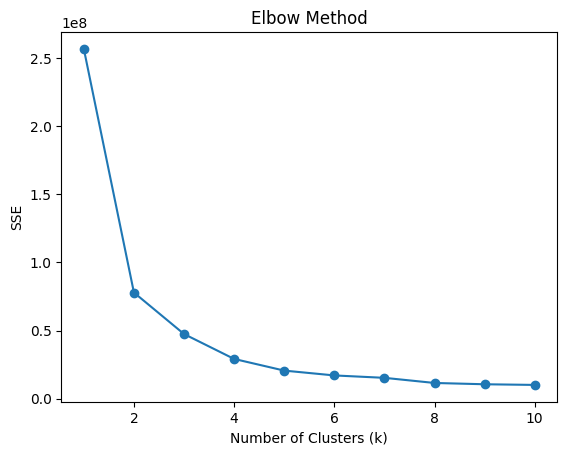

In [28]:
max_k = 10
sse_values = elbow_method(features, max_k=10)
plt.figure()
plt.plot(range(1, max_k+1), sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

best number of k clusters using elbow method is 4/5

In [29]:
# Create an instance of the kmeans class with desired clusters (k=4)
kmeans_model = kmeans(k=4, max_iter=100)

# Fit the model to the data
kmeans_model.fit(features)

# Access the centroids and assignments
print("Centroids:\n", kmeans_model.centroids)
print("Cluster Assignments:\n", kmeans_model.assignments)

# Calculate and display the SSE
sse = kmeans_model.calculate_sse(features)
print("Sum of Squared Errors (SSE):", sse)

Centroids:
 [[2.34015789e+01 2.27621053e+01 1.56147368e+02 1.72942105e+03
  1.04154211e-01 1.71922105e-01 2.39015789e-01 1.34857895e-01
  1.85884211e-01 5.91452632e-02 1.19100000e+00 1.25407895e+00
  8.56357895e+00 1.91449474e+02 7.10673684e-03 3.64242105e-02
  4.79426316e-02 1.59331579e-02 2.00326316e-02 3.80478947e-03
  2.99315789e+01 3.02952632e+01 2.03073684e+02 2.76584211e+03
  1.41510526e-01 3.89415789e-01 5.05994737e-01 2.27526316e-01
  2.89852632e-01 8.18736842e-02]
 [1.89783168e+01 2.16180198e+01 1.25336634e+02 1.12430693e+03
  1.00714653e-01 1.44659505e-01 1.68814257e-01 9.66819802e-02
  1.91992079e-01 6.06493069e-02 6.77129703e-01 1.22934950e+00
  4.76158416e+00 8.14508911e+01 6.48108911e-03 3.16770000e-02
  4.19978218e-02 1.58134455e-02 2.05323762e-02 4.03222772e-03
  2.29415842e+01 2.86826733e+01 1.52752475e+02 1.61797030e+03
  1.39230099e-01 3.46505545e-01 4.38068317e-01 1.87061089e-01
  3.11610891e-01 8.61854455e-02]
 [1.13746604e+01 1.80338060e+01 7.29983582e+01 4.01888

In [30]:
# Create an instance of the PCA class
pca_model = PCA(n_components=2)

# Fit and transform the dataset
X_reduced = pca_model.fit_transform(features)

# Access the principal components
print("Principal Components:\n", pca_model.components)

# Display the reduced dataset
print("Reduced Dataset (First 5 Points):\n", X_reduced[:5])


Principal Components:
 [[ 5.08623202e-03 -9.28705650e-03]
 [ 2.19657026e-03  2.88160658e-03]
 [ 3.50763298e-02 -6.27480827e-02]
 [ 5.16826469e-01 -8.51823720e-01]
 [ 4.23694535e-06  1.48194356e-05]
 [ 4.05260047e-05  2.68862249e-06]
 [ 8.19399539e-05 -7.51419574e-05]
 [ 4.77807775e-05 -4.63501038e-05]
 [ 7.07804332e-06  2.52430431e-05]
 [-2.62155251e-06  1.61197148e-05]
 [ 3.13742507e-04  5.38692831e-05]
 [-6.50984008e-05 -3.48370414e-04]
 [ 2.23634150e-03 -8.19640791e-04]
 [ 5.57271669e-02 -7.51112451e-03]
 [-8.05646029e-07 -1.49438131e-06]
 [ 5.51918197e-06 -1.27357957e-05]
 [ 8.87094462e-06 -2.86921009e-05]
 [ 3.27915009e-06 -9.36007477e-06]
 [-1.24101836e-06 -1.22647432e-05]
 [-8.54530832e-08 -2.89683790e-07]
 [ 7.15473257e-03  5.68673345e-04]
 [ 3.06736622e-03  1.32152605e-02]
 [ 4.94576447e-02  1.85961117e-04]
 [ 8.52063392e-01  5.19742358e-01]
 [ 6.42005481e-06  7.68565692e-05]
 [ 1.01275937e-04  2.56104144e-04]
 [ 1.68928625e-04  1.75471479e-04]
 [ 7.36658178e-05  3.05051743e-0

In [31]:
# Run K-means on the PCA-reduced dataset
kmeans_reduced = kmeans(k=4, max_iter=100)
kmeans_reduced.fit(X_reduced)

# Access centroids and assignments for the reduced dataset
print("Centroids (Reduced):\n", kmeans_reduced.centroids)
print("Cluster Assignments (Reduced):\n", kmeans_reduced.assignments)

# Calculate SSE for the reduced data
sse_reduced = kmeans_reduced.calculate_sse(X_reduced)
print("SSE (Reduced Data):", sse_reduced)


Centroids (Reduced):
 [[-471.00460744   11.22772383]
 [ -20.37127663  -12.25544731]
 [2177.29735764   59.38096711]
 [ 876.71075314  -19.00032076]]
Cluster Assignments (Reduced):
 [3 3 3 0 3 1 3 1 1 1 1 1 3 1 1 1 1 3 2 1 0 0 1 2 3 3 1 3 1 3 3 1 3 3 1 1 1
 0 1 1 1 0 3 1 1 3 0 1 0 1 0 1 0 3 1 0 3 1 0 0 0 0 1 0 1 1 0 0 0 0 3 0 3 1
 0 1 0 3 3 0 0 0 2 3 0 3 1 3 0 1 1 1 1 1 1 3 0 0 0 1 1 0 0 0 0 1 0 0 2 0 0
 0 1 0 0 0 0 1 1 3 0 3 2 1 0 1 1 3 1 3 0 1 1 1 3 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 3 1 0 0 0 3 3 0 2 1 0 3 3 1 0 1 1 0 0 0 0 1 0 0 2 3 1 0 1
 0 3 0 0 0 1 0 0 1 1 0 1 3 3 1 0 3 3 1 0 1 0 1 0 1 3 0 2 1 1 1 0 0 3 2 1 1
 0 1 1 1 0 1 0 1 1 0 0 3 0 1 2 3 1 3 1 0 0 1 3 0 0 0 0 0 3 0 3 3 3 1 3 1 1
 1 3 3 3 1 3 2 0 1 0 0 1 0 2 0 3 0 0 3 1 1 3 0 3 1 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 3 0 3 0 0 0 0 0 1 1 0 1 0 0 0 0 0 3 0 0 0 3 0 3 0 0 1 0 1 1 1 0 0
 0 0 3 0 3 0 2 1 0 0 3 0 0 0 1 0 0 0 1 2 1 0 0 0 1 0 0 0 0 0 1 1 3 3 0 2 2
 1 1 3 3 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 3 0 0 3 3 0 1 1 0 0 0 3 0 0 0 0 

In [32]:
#different number of components in PCA
no_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for comp in no_of_components:
    pca_model = PCA(n_components=comp)
    X_reduced = pca_model.fit_transform(features)
    kmeans_reduced = kmeans(k=4, max_iter=100)
    kmeans_reduced.fit(X_reduced)
    sse_reduced = kmeans_reduced.calculate_sse(X_reduced)
    print("SSE (Reduced Data):", sse_reduced)
    print("no. of components:", comp)

SSE (Reduced Data): 28823916.135840204
no. of components: 2
SSE (Reduced Data): 29177304.58255875
no. of components: 3
SSE (Reduced Data): 29202814.515801087
no. of components: 4
SSE (Reduced Data): 29223543.677013926
no. of components: 5
SSE (Reduced Data): 29225169.48976285
no. of components: 6
SSE (Reduced Data): 29265216.529484846
no. of components: 7
SSE (Reduced Data): 29226386.637277186
no. of components: 8
SSE (Reduced Data): 29226467.423666887
no. of components: 9
SSE (Reduced Data): 29226515.12834315
no. of components: 10


In [33]:
def plot_pca(data, labels=None, title="PCA Visualization"):
    plt.figure(figsize=(8, 6))
    if labels is not None:
        scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=30)
        plt.legend(handles=scatter.legend_elements()[0], title="Clusters")
    else:
        plt.scatter(data[:, 0], data[:, 1], s=30, color="blue")
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()


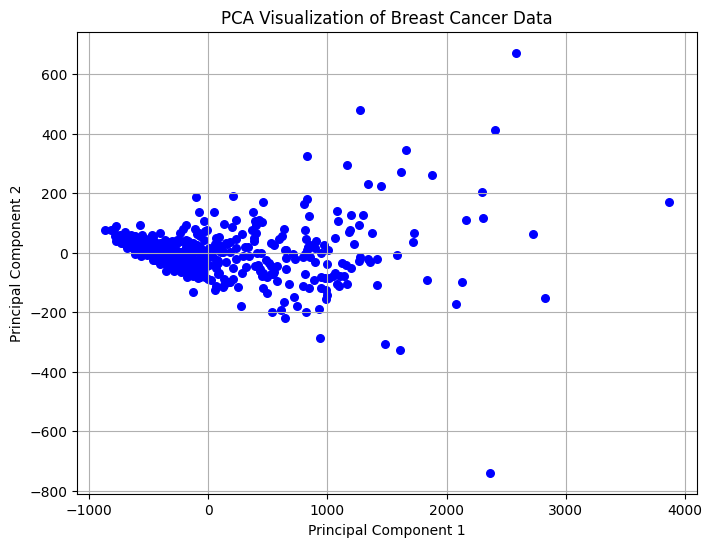

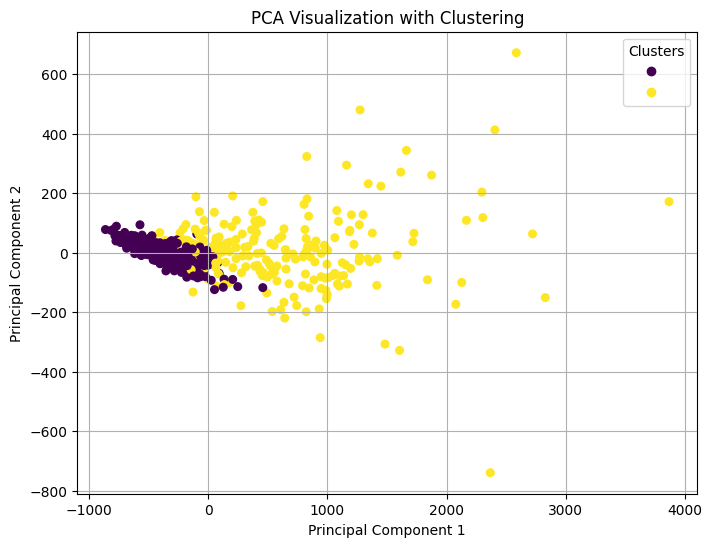

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

pca_model = PCA(n_components=2)
X_reduced = pca_model.fit_transform(features)
plot_pca(X_reduced, title="PCA Visualization of Breast Cancer Data")
plot_pca(X_reduced, labels=numeric_labels, title="PCA Visualization with Clustering")